# Project: Wrangling and Analyze Data
## WeRateDogs twitter user tweet activity analysis

## Introduction 

The focus of this notebook is to demonstrate the processes of gathering data of different formats, from different sources. Assess these datasets, clean, merge and analyze/visualize the final dataset. The aim of this project however is to analyze the tweet activities of a popular twitter account WeRateDogs known to provide hillarious ratings of dog images. It is particularly known to give ratings of over 10 (the rating denominator) to some dog images. And it has said such ratings are "gooddogsbrent" (what ever that means!).

## Datasets Overview

The tweet-archive-enhanced.csv dataset was made available on hand. It contains tweet information about WeRateDogs twitter account tweet activities. The second dataset image-prediction.tsv was programmatically downloaded from the udacity server, and it is a dataset of dog images prediction made by a deep neural network. A json tweets data queried via the twitter API is also used in the analysis, where the data in the json file is read and stored in a dataframe. The json file contains tweets activities of the WeRateDogs twitter user aswell.

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import json
import os 
import matplotlib.pyplot as plt
import seaborn as sb
import requests
%matplotlib inline
%config InlineBackend.figure_formatter='retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing tweet archive data

df_twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')
df_twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


Downloading the dog image predictions dataset from the udacity server

In [5]:
# file download url

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
filepath = os.getcwd()

with open(os.path.join(filepath, url.split('/')[-1]), 'wb') as outfile:
    response = requests.get(url)
    outfile.write(response.content)
    
# importing dataset into a pandas dataframe 

df_image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

### Reading tweets from the tweet_json file

In [45]:
dict_list = [] #list to store dictionary of tweet information
tweet_json = 'tweet-json'
with open(tweet_json, 'r') as file:
    json_str = file.readlines() #reading lines of json data
    for line in json_str:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        dict_list.append({'tweet_id': tweet_id, 
                          'retweet_count': retweet_count,
                          'favorite_count': favorite_count})
        df_tweet_json = pd.DataFrame(dict_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [46]:
# viewing the head of the dataframe 

df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [6]:
# viewing the tail of the dataframe 

df_tweet_json.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


## Assessing Data

### Visual assessment of the three datasets for Quality and Tidiness issues

### df_image_prediction dataframe assessment

In [7]:
# the image prediction dataset 

df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
# verifying unique entries in the dataset based on tweet Ids

df_image_prediction.tweet_id.nunique() == len(df_image_prediction)

True

In [9]:
# displaying summary satistics of the dataset using the describe method of pandas

df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [10]:
# quick information on the dataset using the info menthod of pandas

df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# maximmum value in the p3_conf column

df_image_prediction.p3_conf.max()

0.273419

In [12]:
# average of the p3_conf values

df_image_prediction.p3_conf.mean()

0.06032416861810644

In [13]:
# checking the datatype of the tweet_id column

df_image_prediction.tweet_id.dtype

dtype('int64')

In [14]:
# viewing column labels

list(df_image_prediction)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

- columns  `p1`, `p2` and `p3` contain predicted labels begining with lower case letters
- `df_image_prediction` columns `p1_conf`, `p2_conf` and `p3_conf` values have excessively high precision 

- column labels not descriptive


### df_twitter_archive_enhanced dataframe assessment

In [15]:
# the twittter archive enhanced dataset

df_twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


- `expand_urls` column contains links with non twitter base paths e.g `https://www.gofundme.com`, etc.

In [16]:
# viewing column labels

list(df_twitter_archive_enhanced)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

- dataset contains retweets and replies: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`
- single character entry **a** for a name in the `name` column
- lower case name **(one)** in `name` column

In [17]:
# quick information on the dataset using the info menthod of pandas

df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- erroneous datatype for `timestamp` column (object)

In [18]:
# summary statisics of the dataset

df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


exploring the `rating_denominator` column

In [19]:
# inspecting the distribution of the rating_denominator column

df_twitter_archive_enhanced.rating_denominator.value_counts().index.values

array([ 10,  11,  50,  20,  80,  70,   7,  15, 150, 170,   0,  90,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [20]:
# inspecting the distribution of the rating_numerator column

df_twitter_archive_enhanced.rating_numerator.sort_values().value_counts().index.values

array([  12,   11,   10,   13,    9,    8,    7,   14,    5,    6,    3,
          4,    2,    1,  420,   75,    0,   15,  666,  960,  204,  182,
        165,  144,  143,   88,  121,   99,   27,   84,   80,   60,   50,
         45,   44,   26,   24,   20,   17, 1776], dtype=int64)

In [21]:
# a random sample of ten rows from the dataset

df_twitter_archive_enhanced.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1509,691459709405118465,NaN,NaN,2016-01-25 03:16:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Leo. He's a Fallopian Puffalope. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691459709...,12,10,Leo,None,None,None,None
2279,667405339315146752,NaN,NaN,2015-11-19 18:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Biden. Biden just tripped... 7/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,None,None,None,None
1715,680221482581123072,NaN,NaN,2015-12-25 03:00:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is CeCe. She's patiently waiting for Sant...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680221482...,10,10,CeCe,None,None,None,None
1672,682389078323662849,NaN,NaN,2015-12-31 02:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brody. He's a Downton Abbey Falsetto. Add...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682389078...,9,10,Brody,None,None,None,None
360,829861396166877184,NaN,NaN,2017-02-10 01:15:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She already knows she's a good do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829861396...,12,10,Mia,None,None,None,None
1443,696744641916489729,NaN,NaN,2016-02-08 17:17:22 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Klevin. He doesn't want his family bra...,NaN,NaN,NaN,https://vine.co/v/i1wrljBUjAu,10,10,Klevin,None,None,None,None
61,880221127280381952,NaN,NaN,2017-06-29 00:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jesse. He's a Fetty Woof. His tongue ejec...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880221127...,12,10,Jesse,None,None,None,None
199,854120357044912130,NaN,NaN,2017-04-17 23:52:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854120357...,14,10,None,None,None,pupper,None
2332,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,None,None,None,None
475,816062466425819140,NaN,NaN,2017-01-02 23:23:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Jack. He's one of the rare...,8.159907e+17,4.196984e+09,2017-01-02 18:38:42 +0000,https://www.gofundme.com/surgeryforjacktheminp...,11,10,Jack,None,None,None,None


- `rating_denominator` column values not consistent 
- `expand_urls` column contains more than one entry in some rows

## df_tweet_json dataset assessment

In [22]:
# the json tweets dataset
# displaying dataframe for visual assessment

df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [23]:
# getting summary statistics of the dataset 

df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [24]:
# general information on the dataset with info dataframe method

df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
# checking for missing values 
# and apparently there is non

df_tweet_json.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
1. columns `p1`, `p2` and `p3` contain predicted labels begining with lower case letters in `df_image_prediction`

2. `df_image_prediction` columns `p1_conf`, `p2_conf` and `p3_conf` values have excessively high precision

3. `df_twitter_archive_enhanced` `expanded_urls` column contains links with none twitter base paths e.g `https://www.gofundme.com`, etc.

4. `df_twitter_archive_enhanced` `expanded_urls` column contains more than one entry in some rows

5. `df_twitter_archive_enhanced` `rating_denominator` column values not consistent

6. `df_twitter_archive_enhanced` contains retweets and replies: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`

7. `df_twitter_archive_enhanced` single character entry `a` for a name in the `name` column

8. `df_twitter_archive_enhanced` lower case name **(one)** in `name` column

### Tidiness issues
1. `df_image_prediction` column labels not quite descriptive

2. `df_twitter_archive_enhanced` dataset has erroneous datatype for `timestamp` column (object)

## Cleaning Data

In [6]:
# Make copies of original pieces of data

df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced.copy()
df_image_prediction_clean = df_image_prediction.copy()

### Cleaning data Tidiness issues 

### Issue #1: `df_image_prediction` column labels not quite descriptive

#### Define: 

Create a dictionary of old and new column label pairs, pass dictionary into the replace method of pandas called on the dataframe 

#### Code

In [7]:
# dictionary of old and new column name pairs to be replaced

dict_ = {'jpg_url':'image_url', 'img_num':'image_number', 'p1':'prediction_1', 'p2':'prediction_2', 'p3':'prediction_3', 'p1_conf':'p1_confidence', 'p2_conf':'p2_confidence', 'p3_conf':'p3_confidence', 'p1_dog':'p1_is_dog', 'p2_dog':'p2_is_dog', 'p3_dog':'p3_is_dog'}

In [8]:
# rename the respective columns via the pd.rename() method and effect change inplace

df_image_prediction_clean.rename(columns=dict_, inplace=True)

#### Test

In [29]:
# inspecting column labels

list(df_image_prediction_clean)

['tweet_id',
 'image_url',
 'image_number',
 'prediction_1',
 'p1_confidence',
 'p1_is_dog',
 'prediction_2',
 'p2_confidence',
 'p2_is_dog',
 'prediction_3',
 'p3_confidence',
 'p3_is_dog']

In [30]:
df_image_prediction_clean.head()

,tweet_id,image_url,image_number,prediction_1,p1_confidence,p1_is_dog,prediction_2,p2_confidence,p2_is_dog,prediction_3,p3_confidence,p3_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #2: `df_twitter_archive_enhanced` dataset has erroneous datatype for `timestamp` column (object)

#### Define:

 Change `timestamp` column to pandas datetime object type  

#### Code

In [9]:
# convert timestamp column to datetime object type

df_twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(df_twitter_archive_enhanced_clean['timestamp'])

#### Test

In [10]:
# programmatically assessing the timestamp column 

df_twitter_archive_enhanced_clean.timestamp.dtype 

datetime64[ns, UTC]

In [33]:
# assessing the column with the info function

df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# Cleaning Data Quality Issues 

1. columns `p1`, `p2` and `p3` contain predicted labels begining with lower case letters in `df_image_prediction`

#### Define 

Entries of columns p1, p2 and p3 (now prediction_1, prediction_2 and prediction_3) will be corrected with the first characters changed to uppercase using the title() string method

#### Code

In [11]:
# list of columns to correct to title case

label_list = ['prediction_1', 'prediction_2', 'prediction_3']

In [12]:
# loop to iterate columns and change entries to title case strings

for label in label_list:
    df_image_prediction_clean[label] = df_image_prediction_clean[label].str.title()

#### Test

In [13]:
# programmatically testing the code with the all() function to ensure the change has reflected in the columns

[all(df_image_prediction_clean[label].str.istitle()) for label in label_list]

[True, True, True]

#### visually inspecting the columns for change 

In [37]:
df_image_prediction_clean.prediction_1.head(20)

0     Welsh_Springer_Spaniel
1                    Redbone
2            German_Shepherd
3        Rhodesian_Ridgeback
4         Miniature_Pinscher
5       Bernese_Mountain_Dog
6                 Box_Turtle
7                       Chow
8              Shopping_Cart
9           Miniature_Poodle
10          Golden_Retriever
11             Gordon_Setter
12              Walker_Hound
13                       Pug
14                Bloodhound
15                     Lhasa
16            English_Setter
17                       Hen
18          Desktop_Computer
19         Italian_Greyhound
Name: prediction_1, dtype: object

In [38]:
df_image_prediction_clean.prediction_2.head(20)

0                 Collie
1     Miniature_Pinscher
2               Malinois
3                Redbone
4             Rottweiler
5       English_Springer
6             Mud_Turtle
7        Tibetan_Mastiff
8        Shopping_Basket
9               Komondor
10       Tibetan_Mastiff
11     Yorkshire_Terrier
12      English_Foxhound
13          Bull_Mastiff
14       German_Shepherd
15              Shih-Tzu
16          Newfoundland
17                  Cock
18                  Desk
19           Toy_Terrier
Name: prediction_2, dtype: object

In [39]:
df_image_prediction_clean.prediction_3.head(20)

0               Shetland_Sheepdog
1             Rhodesian_Ridgeback
2                      Bloodhound
3              Miniature_Pinscher
4                        Doberman
5      Greater_Swiss_Mountain_Dog
6                        Terrapin
7                        Fur_Coat
8                Golden_Retriever
9     Soft-Coated_Wheaten_Terrier
10             Labrador_Retriever
11                       Pekinese
12                   Ibizan_Hound
13                 French_Bulldog
14                       Malinois
15                 Dandie_Dinmont
16                         Borzoi
17                      Partridge
18                       Bookcase
19                        Basenji
Name: prediction_3, dtype: object

In [40]:
df_image_prediction_clean

,tweet_id,image_url,image_number,prediction_1,p1_confidence,p1_is_dog,prediction_2,p2_confidence,p2_is_dog,prediction_3,p3_confidence,p3_is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


2. `df_image_prediction` columns `p1_conf`, `p2_conf` and `p3_conf` values have excessively high precision

#### Define

round values in the respective columns to 3 digits precision

#### Code

In [14]:
# list of column labels containing labels to the rounded

labels = ['p1_confidence', 'p2_confidence', 'p3_confidence']

In [15]:
# loop to iterate respective columns and round values to 3-digit precision

for l in labels:
    df_image_prediction_clean[l] = round(df_image_prediction_clean[l], 3)

#### Test

#### visually inspecting the columns for changes 

In [43]:
df_image_prediction_clean.p1_confidence.head(20)

0     0.465
1     0.507
2     0.596
3     0.408
4     0.560
5     0.651
6     0.933
7     0.693
8     0.962
9     0.201
10    0.776
11    0.504
12    0.261
13    0.490
14    0.195
15    0.582
16    0.299
17    0.966
18    0.087
19    0.176
Name: p1_confidence, dtype: float64

In [44]:
df_image_prediction_clean.p2_confidence.head(30)

0     0.157
1     0.074
2     0.139
3     0.361
4     0.244
5     0.264
6     0.046
7     0.058
8     0.015
9     0.192
10    0.094
11    0.174
12    0.175
13    0.405
14    0.078
15    0.166
16    0.150
17    0.034
18    0.086
19    0.112
20    0.063
21    0.015
22    0.278
23    0.055
24    0.148
25    0.002
26    0.260
27    0.009
28    0.244
29    0.271
Name: p2_confidence, dtype: float64

In [45]:
df_image_prediction_clean.p3_confidence.head(20)

0     0.061
1     0.072
2     0.116
3     0.223
4     0.155
5     0.016
6     0.018
7     0.054
8     0.008
9     0.082
10    0.072
11    0.109
12    0.097
13    0.049
14    0.076
15    0.090
16    0.134
17    0.000
18    0.079
19    0.111
Name: p3_confidence, dtype: float64

3. df_twitter_archive_enhanced `expanded_urls` column contains links with non-twitter base paths e.g `https://www.gofundme.com`, etc.
4. df_twitter_archive_enhanced `expanded_urls` column contains more than one entry in some rows

#### Define 

Loop over rows of the series and filter out entries with non twitter base paths; 
split rows with more than one entry and return a single value (string) which must have to be a twitter link in this case.

#### Code

In [16]:
# a loop to correct multiple row entries in the expanded_urls column

for idxs, row in df_twitter_archive_enhanced_clean['expanded_urls'].astype(str).iteritems():
    if ',' in row:
        list_ = row.split(',')
        for item in list_:
            if item.startswith('https://twitter'):
#                 we match any url with a twitter base path in the row as they could be repeated, while ignoring urls
#                   with non twitter base paths. Access any of the matched strings in the list, in this case the first link. 
                link = item[0]
                df_twitter_archive_enhanced_clean['expanded_urls'][idxs] = link

#### Test 

In [17]:
# visually inspecting the `expanded_urls` column to ensure change was effected

df_twitter_archive_enhanced_clean['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4                                                       h
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2356, dtype: object

**from the visual inspection, expanded_urls column appears to contain yet another url with starting string 'https://vine.co/'
at multiple indexes. Hence we shall revisit the definition and coding stage to filter out the unwanted url from the column.**

#### Define

filter dataset by rows containing url with the starting string 'https://vine.co/' using a mask. Obtain row indices 
for these rows and drop all such rows containing the url string.

#### Code

In [19]:
# url string to use for mask

url_string = 'https://vine.co/'

In [20]:
# filtering dataframe by non null values in the expanded_urls column

df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['expanded_urls'].notna()]

In [21]:
# testing to ensure filtering worked 

df_twitter_archive_enhanced_clean['expanded_urls'].isna().sum()

0

In [22]:
# creating a mask for the expanded_urls column entries matching the url string

mask = df_twitter_archive_enhanced_clean['expanded_urls'].str.startswith(url_string)
mask.astype(bool)

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: expanded_urls, Length: 2297, dtype: bool

In [23]:
# return records containing matched url_string and obtain the indexes of these records 

index_list = df_twitter_archive_enhanced_clean[mask].index

In [24]:
# drop records with specified indexes in the indx_list

df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean.drop(index_list, axis=0)

#### Test

In [25]:
# visually inspecting the column to ensure change was effected 

df_twitter_archive_enhanced_clean['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4                                                       h
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2194, dtype: object

### noted errors (unwanted urls in the column)

https://us.blastingnews.com/news/
https://m.youtube.com/
https://weratedogs.com

In [26]:
# filtering dataframe by twitter urls. This excludes all non twitter urls

df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[(df_twitter_archive_enhanced_clean['expanded_urls'].str.startswith('https://twitter'))]

#### Test

In [27]:
# visually inspecting dataframe column 

df_twitter_archive_enhanced_clean['expanded_urls']

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
5       https://twitter.com/dog_rates/status/891087950...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 1564, dtype: object

from the visual inspection, the column is clean from all non twitter urls. 

5. df_twitter_archive_enhanced `rating_denominator` column values not consistent

#### Define 

Replace all values in the column `rating_denominator` that is not 10 with 10.

#### Code

In [28]:
# create a set of values in the rating_denominator column that is not 10

nonten_denom = df_twitter_archive_enhanced_clean[~(df_twitter_archive_enhanced_clean['rating_denominator']== 10)]['rating_denominator']
nonten_denom = set(nonten_denom)

In [29]:
# set of rating denominator values that are not 10

nonten_denom

{2, 11, 20, 40, 50, 80, 90, 110, 120, 150, 170}

In [30]:
# loop through the values of column rating_denominator and replace entries that are not 10 with 10

for vl in df_twitter_archive_enhanced_clean['rating_denominator']:
    if vl in nonten_denom:
        df_twitter_archive_enhanced_clean['rating_denominator'] = df_twitter_archive_enhanced_clean['rating_denominator'].replace(vl, 10)

#### Test

In [31]:
# taking counts of values in the column to test the code 

df_twitter_archive_enhanced_clean['rating_denominator'].value_counts()

10    1564
Name: rating_denominator, dtype: int64

In [32]:
# checking unique values in the column

df_twitter_archive_enhanced_clean['rating_denominator'].nunique()

1

6. df_twitter_archive_enhanced contains retweets and replies: `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`

#### Define

Filter dataset by null entries of `retweeted_status_id` column, and then drop the columns.

#### Code

In [33]:
# since original tweets alone are needed in this analysis, first the dataframe will be filtered by null values of the retweeted_
# status_id column to have a dataframe of original tweets only
 
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean[df_twitter_archive_enhanced_clean['retweeted_status_id'].isna()]

In [34]:
# ensuring filtering worked as expected

all(df_twitter_archive_enhanced_clean['retweeted_status_id'].isna())

True

In [35]:
# drop retweeted_status_id column alongside retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and
# in_reply_to_user_id columns respectively; the last two columns are mostly of nan entries.

columns_todrop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id']

In [36]:
# drop columns in list

df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean.drop(columns_todrop, axis=1)

#### Test

In [37]:
# visually inspecting column labels to ensure appriopriate columns were dropped

df_twitter_archive_enhanced_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [38]:
# using the list function to return all column labels

list(df_twitter_archive_enhanced_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

7. df_twitter_archive single character entry `a` for a name in the `name` column
8. df_twitter_archive lower case name **(one)** in `name` column

#### Define 

since these names do not seem like valid user names, the row containing this names will be dropped as there is no idea of 
what the correct or actual names are supposed to be.

#### Code 

In [39]:
# filtering the dataset by names 'a' and 'one' in the name column and obtaining row indexes for these rows 

index_todrop = df_twitter_archive_enhanced_clean[(df_twitter_archive_enhanced_clean.name=='a') & (df_twitter_archive_enhanced_clean.name=='one')].index

In [40]:
# dropping rows by index 

df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean.drop(index_todrop, axis=0)

#### Test

In [41]:
# visually inspecting the name column to ensure the rows were dropped

df_twitter_archive_enhanced_clean['name']

0       Phineas
1         Tilly
2        Archie
3         Darla
5          None
         ...   
2351       None
2352          a
2353          a
2354          a
2355       None
Name: name, Length: 1514, dtype: object

In [42]:
# programatically testing to check whether the rows were dropped

any((df_twitter_archive_enhanced_clean.name=='a') & (df_twitter_archive_enhanced_clean.name=='one'))

False

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
# merging datasets df_twitter_archive_enhanced_clean, df_image_prediction_clean and df_tweet_json
# first merging df_twitter_archive_enhanced_clean with df_image_prediction_clean on the tweet_id column

df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean.merge(df_image_prediction_clean, how='left', on='tweet_id')

In [47]:
# merging the returned (merged) df_twitter_archive_enhanced_clean dataframe with the df_tweet_json dataframe on tweet_id column

df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced_clean.merge(df_tweet_json, how='left', on='tweet_id')

In [74]:
# displaying merged dataframe

df_twitter_archive_enhanced_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_confidence,p1_is_dog,prediction_2,p2_confidence,p2_is_dog,prediction_3,p3_confidence,p3_is_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097,False,Bagel,0.086,False,Banana,0.076,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.324,True,Pekinese,0.091,True,Papillon,0.069,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716,True,Malamute,0.078,True,Kelpie,0.031,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170,False,Labrador_Retriever,0.168,True,Spatula,0.041,False,8964,42908
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,...,0.426,True,Irish_Terrier,0.116,True,Indian_Elephant,0.077,False,3261,20562


In [48]:
# saving merged dataframe as a csv file

file = 'twitter_archive_master'
with open(file, 'w') as f:
#     create a file handle and write the csv file to it

    df_twitter_archive_enhanced_clean.to_csv('twitter_archive_master', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [49]:
# import the saved csv file to a pandas dataframe object for analysis

df = pd.read_csv('twitter_archive_master.csv', sep=',')

In [50]:
# specify columns for filtering dataframe

tab1 = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name', 'image_url']
tab2 = ['tweet_id', 'rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo', 'retweet_count', 'favorite_count']
tab3 = ['tweet_id', 'image_number', 'prediction_1', 'p1_confidence', 'p1_is_dog', 'prediction_2', 'p2_confidence', 'p2_is_dog', 'prediction_3', 'p3_confidence', 'p3_is_dog']

In [51]:
# filter the dataframe by the columns for analysis and visualization

df_tweet = df[tab1]
df_rating = df[tab2]
df_pred = df[tab3]

In [79]:
# tweet dataframe

df_tweet

,tweet_id,timestamp,source,text,expanded_urls,name,image_url
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
...,...,...,...,...,...,...,...
1509,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
1510,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
1511,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
1512,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,a,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg


In [80]:
# rating dataframe 

df_rating

,tweet_id,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,13,10,None,None,None,None,8853,39467
1,892177421306343426,13,10,None,None,None,None,6514,33819
2,891815181378084864,12,10,None,None,None,None,4328,25461
3,891689557279858688,13,10,None,None,None,None,8964,42908
4,891087950875897856,13,10,None,None,None,None,3261,20562
...,...,...,...,...,...,...,...,...,...
1509,666049248165822465,5,10,None,None,None,None,41,111
1510,666044226329800704,6,10,None,None,None,None,147,311
1511,666033412701032449,9,10,None,None,None,None,47,128
1512,666029285002620928,7,10,None,None,None,None,48,132


In [81]:
# prediction dataframe

df_pred

,tweet_id,image_number,prediction_1,p1_confidence,p1_is_dog,prediction_2,p2_confidence,p2_is_dog,prediction_3,p3_confidence,p3_is_dog
0,892420643555336193,1.0,Orange,0.097,False,Bagel,0.086,False,Banana,0.076,False
1,892177421306343426,1.0,Chihuahua,0.324,True,Pekinese,0.091,True,Papillon,0.069,True
2,891815181378084864,1.0,Chihuahua,0.716,True,Malamute,0.078,True,Kelpie,0.031,True
3,891689557279858688,1.0,Paper_Towel,0.170,False,Labrador_Retriever,0.168,True,Spatula,0.041,False
4,891087950875897856,1.0,Chesapeake_Bay_Retriever,0.426,True,Irish_Terrier,0.116,True,Indian_Elephant,0.077,False
...,...,...,...,...,...,...,...,...,...,...,...
1509,666049248165822465,1.0,Miniature_Pinscher,0.560,True,Rottweiler,0.244,True,Doberman,0.155,True
1510,666044226329800704,1.0,Rhodesian_Ridgeback,0.408,True,Redbone,0.361,True,Miniature_Pinscher,0.223,True
1511,666033412701032449,1.0,German_Shepherd,0.596,True,Malinois,0.139,True,Bloodhound,0.116,True
1512,666029285002620928,1.0,Redbone,0.507,True,Miniature_Pinscher,0.074,True,Rhodesian_Ridgeback,0.072,True


In [52]:
# collapse the 'doggo', 'floofer', 'pupper' and 'puppo' columns of df_rating dataframe into a new dog_stage column

df_rating = df_rating.melt(id_vars=['tweet_id', 'rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_stage', value_name='dog_stage_in_image')

- Do high rated dog images have high retweet_count?

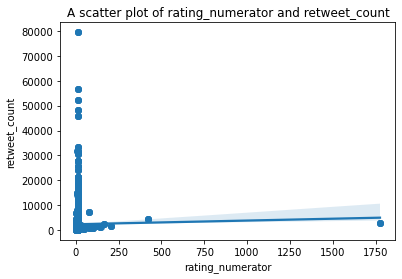

In [53]:
# a scatter plot of rating_numerator and retweet_count

sb.regplot(data= df_rating, x='rating_numerator', y='retweet_count', x_jitter=0.8)
plt.title('A scatter plot of rating_numerator and retweet_count', fontsize=12);

- What dog stage image has the highest retweet_count?

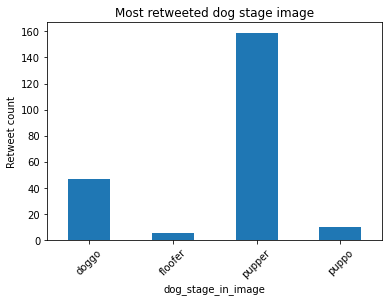

In [54]:
# dog stage with the highest retweet_count

df_rating[~(df_rating['dog_stage_in_image']=='None')].groupby('dog_stage_in_image')['retweet_count'].count().plot(kind='bar')
plt.ylabel('Retweet count')
plt.xticks(rotation=45)
plt.title('Most retweeted dog stage image');

In [55]:
# collapse the 'p1_confidence', 'p2_confidence' and 'p3_confidence' columns to a new column confidence_value

df_pred = df_pred.melt(id_vars=['tweet_id', 'image_number'], value_vars=['p1_confidence', 'p2_confidence', 'p3_confidence'], var_name='prediction_confidence', value_name='confidence_value')

- Which of the neural network predictions is often of higher confidence of the three predictions of dog images?

In [56]:
# summarizing the data using the groupby method

df_pred.groupby('prediction_confidence')['confidence_value'].mean()

prediction_confidence
p1_confidence    0.554332
p2_confidence    0.142527
p3_confidence    0.064989
Name: confidence_value, dtype: float64

- Is there a relationship between the retweet_count and favorite_count columns?

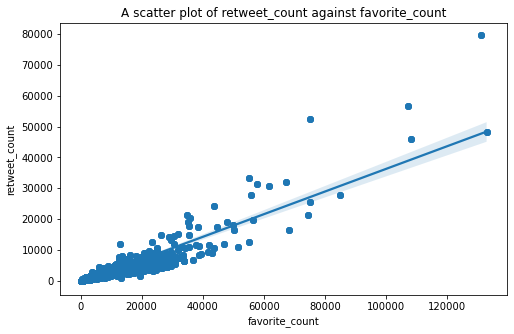

In [57]:
# what relationship exist between the retweet_count and favorite_count columns?

fig = plt.figure(figsize=(8, 5))
sb.regplot(data=df_rating, x='favorite_count', y='retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('A scatter plot of retweet_count against favorite_count');

In [58]:
# correlation of retweet_count and favorite_count

df_rating[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.911164
favorite_count,0.911164,1.000000


### Insights:
1. High rated dog images do not seem to have a strong positive correlation with high retweet_count. The regression plot line of best fit, however, suggest a rather weak correlation between these variables. 

2. Pupper dog stage images appears to have the highest retweet count followed by the doggo, with the puppo dog stage images having nearly twice the number of retweets as the floofer dog stage images. This suggests that people engage more with the pupper dog stage images, with less engagement with floofer dog stage images.

3. First image predictions of the neural network often tend to be of higher confidence than the second and third predictions respectively. This trend informs why the dorminating image number is 1. The image number 3 is scarcely found in the image number column as the third prediction often have the least confidence value. The reason for this observation could be further investigated.
4. There is a positive correlation of retweet count and favorite count. These variables appear to be moving in similar direction with strong correlation coefficient value of .91. This might be indicative of some form of relationship  between the two variables. 

### Visualization

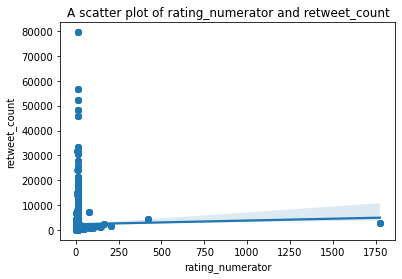

In [59]:
# a scatter plot of rating_numerator and retweet_count

sb.regplot(data= df_rating, x='rating_numerator', y='retweet_count', x_jitter=0.8)
plt.title('A scatter plot of rating_numerator and retweet_count', fontsize=12);

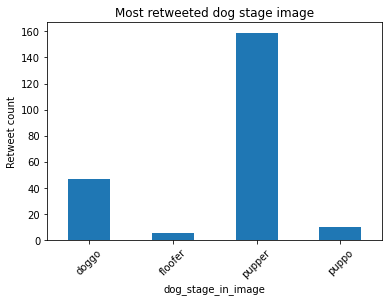

In [60]:
# dog stage with the highest retweet_count

df_rating[~(df_rating['dog_stage_in_image']=='None')].groupby('dog_stage_in_image')['retweet_count'].count().plot(kind='bar')
plt.ylabel('Retweet count')
plt.xticks(rotation=45)
plt.title('Most retweeted dog stage image');

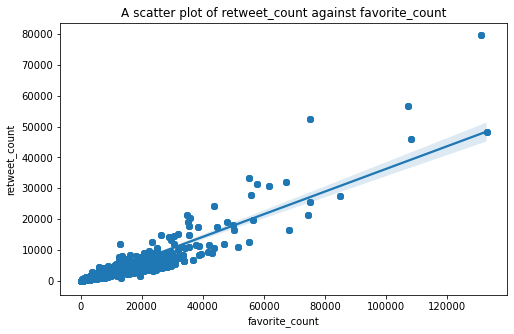

In [61]:
# what relationship exist between the retweet_count and favorite_count columns?

fig = plt.figure(figsize=(8, 5))
sb.regplot(data=df_rating, x='favorite_count', y='retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('A scatter plot of retweet_count against favorite_count');